<a href="https://colab.research.google.com/github/jtkernan7/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/JT_Kernan_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO 

#Load and Clean Data Set



import pandas as pd
import numpy as np

c_headers = ['age_of_patient', 'year_of_op', 'positive_ax_nodes', 'survival_status']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names =c_headers)

print(df.shape)  #matches description on UCI 306 observations
# print(df.head())
df.isnull().sum() #confirmed on UCI no missing values
df['survival_status'] = df['survival_status']-1 #Change survival status key to 0 for survive 5+ years or 1 for passed away within 5
# print(df.dtypes)



(306, 4)


In [0]:
df.head() #Part 1 complete

,age_of_patient,year_of_op,positive_ax_nodes,survival_status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
df.describe()#

,age_of_patient,year_of_op,positive_ax_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
# TODO

age_bins = pd.cut(df['age_of_patient'], 5)

ct1 = pd.crosstab(age_bins, df['survival_status'])

print(ct1) #Shows amount of patients who survived surgery by age group
            #I think it is easier to understand with the actual numbers and not percent aftter looking at both

survival_status   0   1
age_of_patient         
(29.947, 40.6]   39   4
(40.6, 51.2]     68  31
(51.2, 61.8]     69  27
(61.8, 72.4]     43  16
(72.4, 83.0]      6   3


In [0]:

ct = pd.crosstab( df['survival_status'], df['year_of_op'], normalize='columns')#survival status as compared to year of surgery

# ct = pd.crosstab( df['survival_status'], df['year_of_op'], normalize =True)
ct

year_of_op,58,59,60,61,62,63,64,65,66,67,68,69
survival_status,,,,,,,,,,,,
0,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364
1,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636


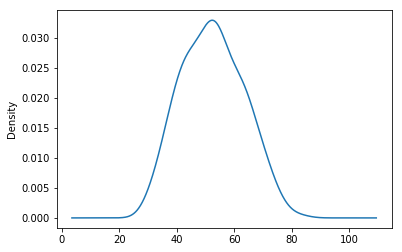

In [0]:
df['age_of_patient'].plot.density(); #better display of ages where people got this surgery

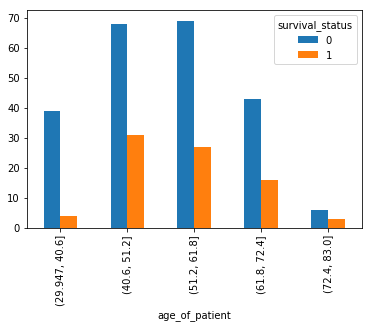

In [0]:
ct1.plot(kind='bar');#number of ppl survived 5 years vs not by age group

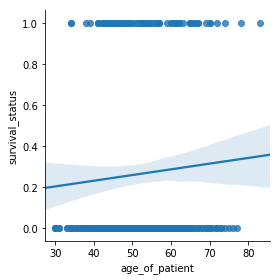

In [0]:
import seaborn as sns
g = sns.FacetGrid(df, height=4)
g.map(sns.regplot, 'age_of_patient', 'survival_status')

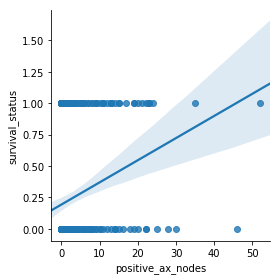

In [0]:
g = sns.FacetGrid(df, height=4)
g.map(sns.regplot, 'positive_ax_nodes', 'survival_status');

#number of positive axillary nodes detected vs survival rate
#seems to have positive corellation relationship but multiple extreme outliers

In [0]:
#binned node count so outliers don't courrupt
node_bins = pd.cut(df['positive_ax_nodes'], 10)

ct2 = pd.crosstab(node_bins, df['survival_status'])

print(ct2)

survival_status      0   1
positive_ax_nodes         
(-0.052, 5.2]      190  46
(5.2, 10.4]         18  12
(10.4, 15.6]         7  11
(15.6, 20.8]         4   4
(20.8, 26.0]         3   6
(26.0, 31.2]         2   0
(31.2, 36.4]         0   1
(41.6, 46.8]         1   0
(46.8, 52.0]         0   1


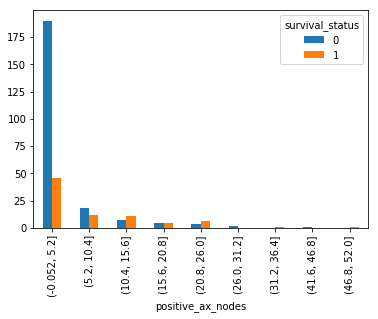

In [0]:
ct2.plot(kind='bar');

#seems to have strong negative relationship now with bins.
#rate of survival is highest with very low number of positive axillary nodes


In [0]:
# ct3 = pd.crosstab(age_bins, node_bins, normalize='columns') #can't get crosstab to work with second element binned

ct3 = pd.crosstab(age_bins, df['year_of_op'], normalize='columns')

print(ct3)

year_of_op            58        59        60        61        62        63  \
age_of_patient                                                               
(29.947, 40.6]  0.166667  0.185185  0.321429  0.038462  0.086957  0.166667   
(40.6, 51.2]    0.277778  0.407407  0.214286  0.384615  0.304348  0.400000   
(51.2, 61.8]    0.222222  0.296296  0.392857  0.307692  0.391304  0.233333   
(61.8, 72.4]    0.305556  0.111111  0.071429  0.269231  0.130435  0.166667   
(72.4, 83.0]    0.027778  0.000000  0.000000  0.000000  0.086957  0.033333   

year_of_op            64        65        66    67        68        69  
age_of_patient                                                          
(29.947, 40.6]  0.096774  0.107143  0.142857  0.12  0.000000  0.181818  
(40.6, 51.2]    0.419355  0.321429  0.285714  0.32  0.153846  0.272727  
(51.2, 61.8]    0.354839  0.321429  0.250000  0.28  0.384615  0.545455  
(61.8, 72.4]    0.129032  0.142857  0.321429  0.24  0.384615  0.000000  
(72.4, 83.0]   

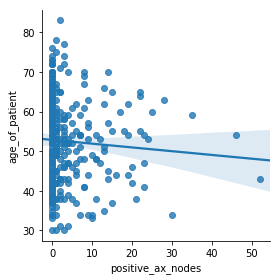

In [105]:
g = sns.FacetGrid(df, height=4)
g.map(sns.regplot, 'positive_ax_nodes', 'age_of_patient');

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

I do not really think any feature has a positive relationship with survival.
year of operation does not seem to have any relationship with survival. Survival rate is pretty similar throughout.
Age seems to have a negative relationship with survival.
As age increases the percent of patients who survive past five years decreases.

The amount of postitive axillary nodes looks to have a negative relationship with survival. The trend seems to be the more positive nodes the less likely one is to survive. A good majority of patients survive over 5 years when there was a low recorded amount of positive axillary nodes. As positive axillary node observation count  increases patiets are just as likely or more likely to not survive 5 years. This can be seen most clearly with the graph

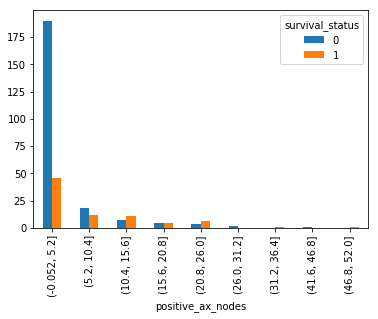

In [102]:
ct2.plot(kind='bar');


When comparing positive axillary node instances to the age of patient it appears that there is a trend of younger patients having more positive axillary node detected.

Fully hypothesising here, but this could be because there are more complications with the younger patients who need this surgery.

Older patients could be because of age complications whereas younger patients may need for other health complications as well.(obesity for example)